## Data analysis code for gain=1000 and gain=5000 data taken on 02/25/2025 and 02/27/2025. Plots histogram and fits with a Gaussian.

In [5]:
import numpy as np  
import matplotlib.pyplot as plt
import re
import os
from scipy import optimize
from scipy.ndimage import gaussian_filter
import h5py

## Define functions for Gaussian fitting

In [6]:
def gaussian(p, x):
    return p[0]/(p[1]*(2*np.pi)**.5)*np.exp(-.5*(x-p[2])**2/(p[1]**2))
def exp(p, x):
    return p[0]*p[1]*np.exp(-p[1]*(x-p[2]))

In [7]:
def gaussian_fit(counts,probability,probability_uncertainty,p0,show_details):
    def residual(p, x, y,dy):
        return (gaussian(p, x)-y)/dy
    pf, cov, info, mesg, success = optimize.leastsq(residual, p0, args = (counts, probability, probability_uncertainty), full_output=1, maxfev=5000)
    print('AAA')
    print(pf)
    print(cov)
    print(info)
    print(mesg)
    print(success)
    if cov is None:
        print('Fit did not converge')
        print('Success code:', success)
        print(mesg)
        fig = plt.figure(figsize=(8,5))
        ax = fig.add_subplot(111)
        ax.errorbar(counts, probability, probability_uncertainty, fmt='k.', label = 'Data')
        x = np.linspace(min(counts),max(counts),1000)
        ax.plot(x, readout_noise_and_CIC(p0, x), 'b-', label = 'Guess')
        ax.legend()
        ax.set_title('CIC measurement')
        ax.set_xlabel('AD count')
        ax.set_ylabel('Probability')
        ax.set_yscale('log')
        ax.grid()
        plt.show()
    else:
        pferr = [np.sqrt(cov[i,i]) for i in range(len(pf))]
        if show_details:
            print('Fit Converged')
            chisq = sum(info['fvec']*info['fvec'])
            dof = abs(len(counts)-len(pf))
            print('Converged with chi-squared', chisq)
            print('Number of degrees of freedom, dof =',dof)
            print('Reduced chi-squared', chisq/dof)
            print('Inital guess values:')
            print('  p0 =', p0)
            print('Best fit values:')
            print('  pf =', list(pf))
            print('Uncertainties in the best fit values:')
            print('  pferr =', pferr)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            ax.errorbar(counts, probability, probability_uncertainty, fmt='k.', label = 'Data',alpha=.5)
            x = np.linspace(min(counts),max(counts),1000)
            ax.set_yscale('log')
            ax.plot(x, readout_noise_and_CIC(pf, x), 'r-', label = 'Fit')
            # ax.plot(x, readout_noise_and_CIC(p0, x), 'b-', label = 'Guess')
            ax.set_title('CIC measurement')
            ax.set_xlabel('AD count')
            ax.set_ylabel('Probability')
            ax.grid()
            ax.legend(loc=3)
            plt.tight_layout()
            plt.show()
            print("serial CIC: {}%".format(round(float(pf[2])*100,2)))
            print("parallel CIC: {}%".format(round(float(pf[0])*100,2)))
            print("gain: {}".format(round(4.31/pf[1])))
            print("readout noise: {} electrons".format(round(pf[4]*pf[1],4)))
    return pf

# Plot gain=5000 data
10mW, gain=5000, 

139
146


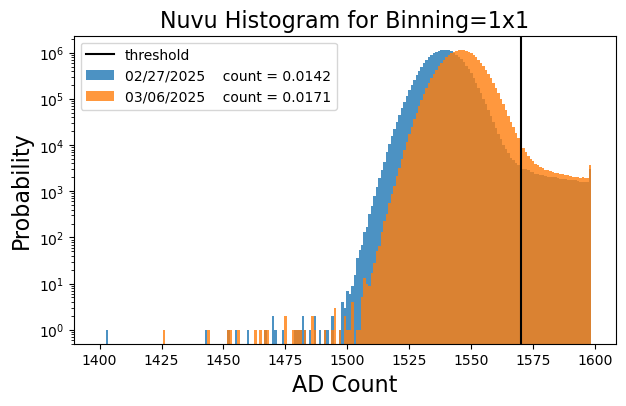

In [21]:
# For binning=1x1
folder_path_0227 = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0033' #10mW, with acktar _ collimated
folder_path_0306_straight = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\03\06\0024'
folders = [folder_path_0227, folder_path_0306_straight]
labels = [ '02/27/2025', '03/06/2025']

all_images_binning1 = np.full((2, 80, 512, 512), np.NaN)
for count_a, folder_path in enumerate(folders):
    for count_b, filename in enumerate(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, filename)
        with h5py.File(file_path, 'r') as file:
            if count_b==80:
                break
            image_data = file['images/camera/fluorescence/frame'][:]
            all_images_binning1[count_a, count_b, :, :] = image_data



counting_threshold = 1570
counts = np.mean(all_images_binning1>counting_threshold, axis = (1,2,3))


plt.figure(figsize=(7, 4), num = 'histograms')

bins = np.arange(1400, 1600, 1)
for i, images in enumerate(all_images_binning1):
    hist, bin_edges = np.histogram(images, bins=bins)  # Adjust the number of bins as needed
    print(np.argmax(hist))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), alpha = 0.8, label = labels[i] + '    count = ' + '%.4f'%counts[i])



plt.axvline(x = counting_threshold, label = 'threshold', c = 'k')

plt.title('Nuvu Histogram for Binning=1x1', fontsize=16)
plt.xlabel('AD Count', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.yscale('log', base=10)
plt.legend()
plt.show()

69
69


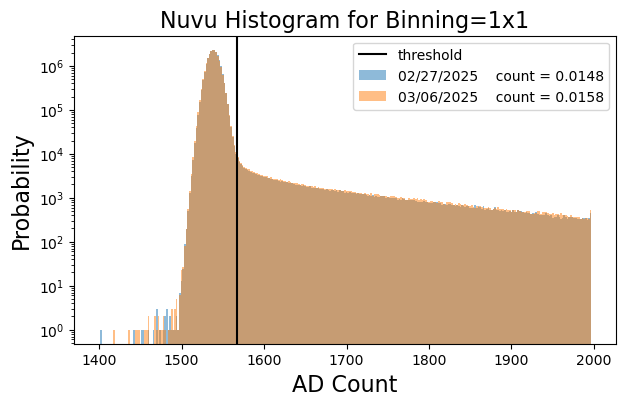

In [28]:
# For binning=1x1
folder_path_0227 = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0033' #10mW, with acktar _ collimated
folder_path_0306_straight = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\03\06\0024'
folders = [folder_path_0227, folder_path_0306_straight]
labels = [ '02/27/2025', '03/06/2025']

all_images_binning1 = np.full((2, 80, 512, 512), np.NaN)
for count_a, folder_path in enumerate(folders):
    for count_b, filename in enumerate(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, filename)
        with h5py.File(file_path, 'r') as file:
            if count_b==80:
                break
            image_data = file['images/camera/fluorescence/frame'][:]
            all_images_binning1[count_a, count_b, :, :] = image_data


#subtract 7
all_images_binning1[1, :, :, :] = all_images_binning1[1, :, :, :]-7

counting_threshold = 1567
counts = np.mean(all_images_binning1>counting_threshold, axis = (1,2,3))


plt.figure(figsize=(7, 4), num = 'histograms')

bins = np.arange(1400, 2000, 2)
for i, images in enumerate(all_images_binning1):
    hist, bin_edges = np.histogram(images, bins=bins)  # Adjust the number of bins as needed
    print(np.argmax(hist))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), alpha = 0.5, label = labels[i] + '    count = ' + '%.4f'%counts[i])



plt.axvline(x = counting_threshold, label = 'threshold', c = 'k')

plt.title('Nuvu Histogram for Binning=1x1', fontsize=16)
plt.xlabel('AD Count', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.yscale('log', base=10)
plt.legend()
plt.show()

In [9]:
# plt.figure(num = 'difference')
# plt.imshow(np.mean(all_images_binning1[0,:,:,:], axis=0) - np.mean(all_images_binning1[1,:,:,:], axis=0))
# plt.colorbar()
# plt.title('No acktar - Acktar')